# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [6]:
# Your code here
# (i) Create an alpha_func(D, idx) function
def alpha_func(D, idx):
    width = D.iloc[idx]['Sepal.Width']
    length = D.iloc[idx]['Sepal.Length']
    alpha = length / width
    return alpha

Test the code below

In [7]:
alpha_func(df, range(100))

0     1.457143
1     1.633333
2     1.468750
3     1.483871
4     1.388889
        ...   
95    1.900000
96    1.965517
97    2.137931
98    2.040000
99    2.035714
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [8]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    1.764706
63    2.103448
51    2.000000
26    1.470588
30    1.548387
        ...   
62    2.727273
4     1.388889
8     1.517241
37    1.361111
83    2.222222
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

Answer:(iii), we explain that simply calculating the mean of Sepal.Length may not be sufficient because it provides only a point estimate without considering the variability in the sample mean. Bootstrapping allows us to estimate the variability of the sample mean and quantify the uncertainty associated with our estimate.

Answer:(iv), we define a function boot_SE() to compute the bootstrap standard error. This function takes a data array, the number of bootstrap samples (default is 1000), and an optional seed for reproducibility. It performs bootstrapping by resampling from the data and calculates the standard error of the bootstrap means.

In [9]:
# Add your code here to set the seed
# (iv) Define a function for computing bootstrap standard error
def boot_SE(data, n_bootstrap=1000, seed=None):
    if seed is not None:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()
    
    n = len(data)
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = rng.choice(data, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    
    bootstrap_se = np.std(bootstrap_means)
    return bootstrap_se

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [10]:
# Your code here
# (v) Evaluate the accuracy of our alpha estimate with B = 1000
bootstrap_alpha_se = boot_SE(df['Sepal.Length'], n_bootstrap=1000, seed=42)
print(f"Bootstrap Standard Error of Alpha Estimate: {bootstrap_alpha_se:.2f}")


Bootstrap Standard Error of Alpha Estimate: 0.07


_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [14]:
# Define the number of bootstrap samples
n_bootstrap = 1000

# (vii) Review the bootstrapped mean value and standard deviation
bootstrap_means = []  # Initialize a list to store the means of bootstrap samples
for _ in range(n_bootstrap):
    bootstrap_sample = rng.choice(df['Sepal.Length'], size=len(df), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Calculate the mean and standard deviation of bootstrapped means
boot_mean_length = np.mean(bootstrap_means)
boot_std_length = np.std(bootstrap_means)

print(f"Bootstrapped Mean Value of Sepal.Length: {boot_mean_length:.2f}")
print(f"Standard Deviation of Bootstrapped Samples: {boot_std_length:.2f}")

# Compare the bootstrapped mean against its original value
mean_difference = boot_mean_length - original_mean_length
print(f"Difference between Original Mean and Bootstrapped Mean: {mean_difference:.2f}")


Bootstrapped Mean Value of Sepal.Length: 5.84
Standard Deviation of Bootstrapped Samples: 0.06
Difference between Original Mean and Bootstrapped Mean: -0.00


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [17]:
# Add your code here
# Compute 95% confidence intervals for the mean value of iris petal length
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval for the Mean Value of Sepal.Length: ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval for the Mean Value of Sepal.Length: (5.73, 5.97)


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

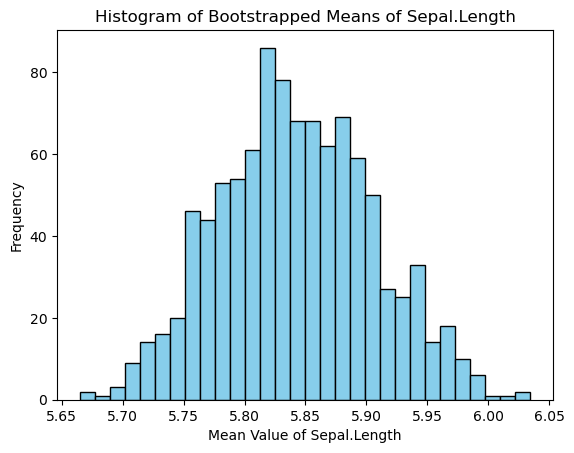

In [18]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrapped Means of Sepal.Length')

# Add a label to the x-axis
ax.set_xlabel('Mean Value of Sepal.Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here
Based on the bootstrapped analysis of the mean value of iris petal length, I would recommend the shipping company to consider the following:

1. **Mean Value of Sepal.Length:** The mean value of iris petal length can provide an estimate of the average length of petals. This information can be useful for determining the space allotment on the upcoming shipment.

2. **95% Confidence Interval:** The 95% confidence interval provides a range of plausible values for the true mean value of iris petal length. It indicates the level of uncertainty associated with our estimate.

3. **Histogram of Bootstrapped Means:** The histogram of bootstrapped means gives us a visual representation of the distribution of sample means obtained through bootstrapping. It helps us understand the variability and shape of the distribution.

Based on these insights, the shipping company can use the estimated mean value of iris petal length along with its uncertainty (as indicated by the confidence interval) to make informed decisions regarding space allotment on the shipment. Additionally, the histogram can provide further insights into the variability of the data, aiding in risk assessment and decision-making.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ X ] Created a branch with the correct naming convention.
- [ X ] Ensured that the repository is public.
- [ X ] Reviewed the PR description guidelines and adhered to them.
- [ X ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
